In [1]:
# GENERAL THINGS FOR COMPUTING AND PLOTTING
import pandas as pd
import numpy as np
import os, sys, time
from datetime import datetime
from datetime import timedelta
import scipy as sp

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# ibl specific things
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data, behavior
from ibl_pipeline.analyses import behavior as behavioral_analyses

# set path for saving figures
figpath = 'figures' # put in the same folder, but add to .gitignore for now

Connecting anneurai@datajoint.internationalbrainlab.org:3306


In [2]:
########### SUBJECTS ########### 

subj = subject.Subject * subject.SubjectLab * (acquisition.Session & 'session_start_time > "2020-01-03"')
subj = subj.proj('lab_name', session_date='DATE(session_start_time)')
df = subj.fetch(format='frame').reset_index()

In [3]:
df
df_nsess = df.groupby(['session_date', 'lab_name'])['session_start_time'].count().reset_index()
df_nsess

,session_date,lab_name,session_start_time
0,2020-01-03,angelakilab,9
1,2020-01-03,churchlandlab,9
2,2020-01-03,danlab,6
3,2020-01-03,mainenlab,9
4,2020-01-03,wittenlab,5
...,...,...,...
497,2020-03-20,mrsicflogellab,7
498,2020-03-20,wittenlab,5
499,2020-03-20,zadorlab,17
500,2020-03-21,zadorlab,13


In [4]:
# MAKE NICE-LOOKING DATE AXES
import matplotlib.dates as mdates
def fix_date_axis(ax):
    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    for item in ax.get_xticklabels():
        item.set_rotation(30)
        item.set(ha='right')

In [5]:
sorted_lab_names = df_nsess.loc[df_nsess.session_date == df_nsess.session_date.max(), :].sort_values(by='session_start_time', ascending=False)['lab_name']
sorted_lab_names = df_nsess.groupby(['lab_name'])['session_start_time'].sum().reset_index().sort_values(by='session_start_time', ascending=False)['lab_name']
sorted_lab_names



9          zadorlab
1     churchlandlab
0       angelakilab
5         mainenlab
6    mrsicflogellab
8         wittenlab
3            danlab
2         cortexlab
4          hoferlab
7      steinmetzlab
Name: lab_name, dtype: object

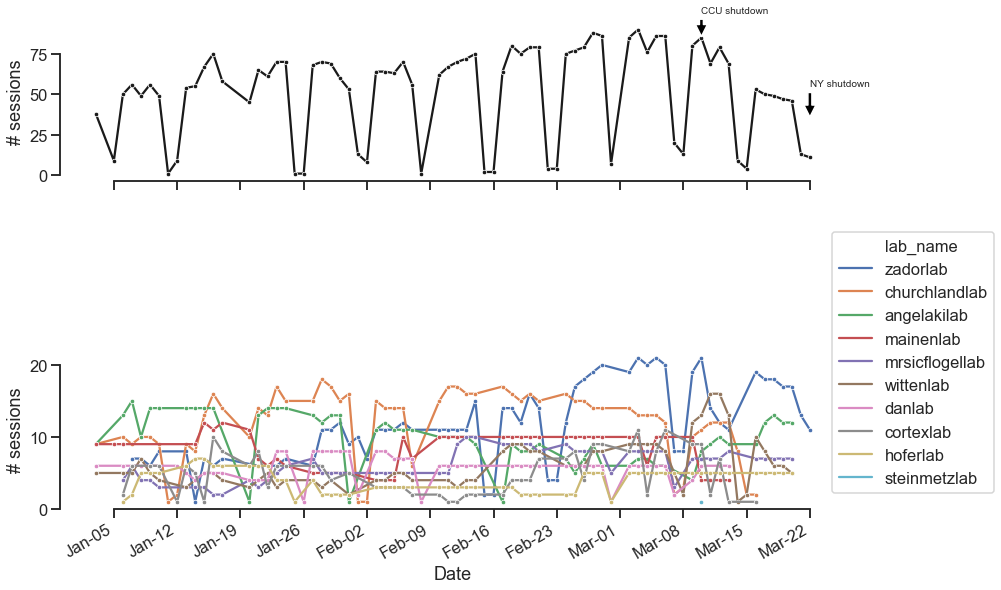

In [10]:
f, ax = plt.subplots(ncols=1, nrows=2, figsize=(14, 8), sharex=True, sharey=False)

sns.lineplot(x="session_date", y="session_start_time", color='k', estimator=np.sum, ci=None,
             data=df_nsess, ax=ax[0], legend=False, marker='.')
sns.lineplot(x="session_date", y="session_start_time", hue='lab_name', hue_order=sorted_lab_names,
             data=df_nsess, ax=ax[1], marker='.')
ax[1].set_xlabel("Date")    
ax[0].set_ylabel("# sessions")   
ax[1].set_ylabel("# sessions")   

# format legend
plt.legend(bbox_to_anchor=(1.2, 1.8))

# annotate some events
# 2020-03-10: CCU shuts down non-essential work
ax[0].annotate('CCU shutdown', xy=(mdates.date2num(datetime(2020, 3, 10).date()), 85), 
               xytext=(mdates.date2num(datetime(2020, 3, 10).date()), 100),
            arrowprops=dict(facecolor='black', shrink=0.05))

# 2020-03-22: NY state shutdown
ax[0].annotate('NY shutdown', xy=(mdates.date2num(datetime(2020, 3, 22).date()), 35), 
               xytext=(mdates.date2num(datetime(2020, 3, 22).date()), 55),
            arrowprops=dict(facecolor='black', shrink=0.05))

f.tight_layout()
fix_date_axis(ax[1])
sns.despine(trim=True)


In [11]:
df_nsess

,session_date,lab_name,session_start_time
0,2020-01-03,angelakilab,9
1,2020-01-03,churchlandlab,9
2,2020-01-03,danlab,6
3,2020-01-03,mainenlab,9
4,2020-01-03,wittenlab,5
...,...,...,...
497,2020-03-20,mrsicflogellab,7
498,2020-03-20,wittenlab,5
499,2020-03-20,zadorlab,17
500,2020-03-21,zadorlab,13
